

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>




<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>




<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


In [63]:
#importando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [64]:
#lendo e importando arquivo 'games.csv'
game_df = pd.read_csv('/datasets/games.csv', sep=',')

In [65]:
#observando os dados
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">
Existem dados nulos nas colunas name, year_of_release, genre, critic_score, user_score e rating. Mais para frente vou definir o que vou fazer com cada uma dessas colunas.
</div>


In [66]:
#preparando dados

#tratando nomes das colunas
#aqui usei o strip() além do lower() para garantir que não haja nenhum espaço no nome das colunas
def prep_str(df):
    df.columns = [x.strip().lower() for x in df.columns]
    return df

prep_str(game_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [67]:
#entendendo os valores nulos da coluna 'year of release'

missing_values_df = game_df[game_df['year_of_release'].isna()]

missing_values_df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
4373,Silent Hill: Homecoming,X360,NaN,Action,0.25,0.15,0.00,0.04,70.0,6.9,M
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
10993,The Daring Game for Girls,Wii,NaN,Adventure,0.09,0.00,0.00,0.01,NaN,tbd,E
8150,Twisted Metal: Small Brawl,PS,NaN,Action,0.10,0.07,0.00,0.01,51.0,7.6,T
3233,Test Drive Unlimited 2,PS3,NaN,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T
6356,Rock Revolution,PS3,NaN,Misc,0.25,0.00,0.00,0.02,42.0,6.6,T
12011,McFarlane's Evil Prophecy,PS2,NaN,Action,0.03,0.03,0.00,0.01,34.0,3.2,M


In [68]:
#preenchendo os valores faltantes da coluna 'year_of_release'

#primeiro dando dropna nos dois nomes faltantes
def drop_nan():
    game_df.dropna(subset=['name'], inplace=True)
    return game_df
drop_nan()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Estou de acordo com a decisão.
</div>


In [69]:
#função para preencher a coluna especificada de acordo com: mesmo nome e plataforma, mesmo nome ou mesma plataforma.

def filling_3col(df, col, col1, col2, col3):
    #preenchendo a coluna year_of_release com o mesmo nome e mesma plataforma.
    df[col] = df.groupby([col1, col2])[col3].transform(lambda x: x.fillna(x.min()))
    return df

def filling_2col(df, col, col1, col2):
    #preenchendo a coluna year_of_release com o mesmo nome e mesma plataforma.
    df[col] = df.groupby([col1])[col2].transform(lambda x: x.fillna(x.min()))
    return df
#preenchendo a coluna 'year of release'
filling_3col(game_df, 'year_of_release', 'platform', 'name','year_of_release')
filling_2col(game_df, 'year_of_release', 'platform','year_of_release')
filling_2col(game_df, 'year_of_release', 'name','year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [70]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-info">
Para preencher os valores faltantes, usei o mesmo ano de lançamento de outras plataformas. Anteriormente havia preenchido com 0, mas me deu problemas lá na frente para analisar alguns dados. 
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito elegante a solução proposta, estou de acordo!
</div>


In [71]:
#função para converter os tipos
def convert_type(df, col, type_format):
    df[col] = df[col].astype(type_format)
    return df

#convertendo ano de float para int.
convert_type(game_df, 'year_of_release', int)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [72]:
# Entendendo os valores tbd

game_df_tbd = game_df[game_df['user_score'] == 'tbd']

game_df_tbd.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6516,Summer Sports 2: Island Sports Party,Wii,2008,Sports,0.24,0.00,0.0,0.02,NaN,tbd,E
10917,Ford Mustang: The Legend Lives,XB,2005,Racing,0.07,0.02,0.0,0.00,55.0,tbd,E
12710,Aquarium by DS,DS,2008,Simulation,0.05,0.00,0.0,0.00,NaN,tbd,NaN
10807,Alvin and the Chipmunks: The Squeakquel,Wii,2009,Misc,0.09,0.00,0.0,0.01,NaN,tbd,E
2823,Imagine: Interior Designer,DS,2008,Simulation,0.34,0.31,0.0,0.08,NaN,tbd,E


<div class="alert alert-block alert-info">
Aqui eu entendi que os valores tbd são valores que ainda seriam definidos, então transformei eles em um NaN para poder convertê-los.
</div>

In [73]:
#função para substituir valores nas rows
def replacing_value():
    game_df['user_score'] = game_df['user_score'].replace('tbd', np.nan).astype(float)
    return game_df

replacing_value()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [74]:
#criando a coluna 'total_sales' com a soma da venda de todas as regiões 
game_df['total_sales'] = game_df['na_sales'] + game_df['eu_sales'] + game_df['jp_sales'] + game_df['other_sales']

game_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Soma das regiões realizada!
</div>


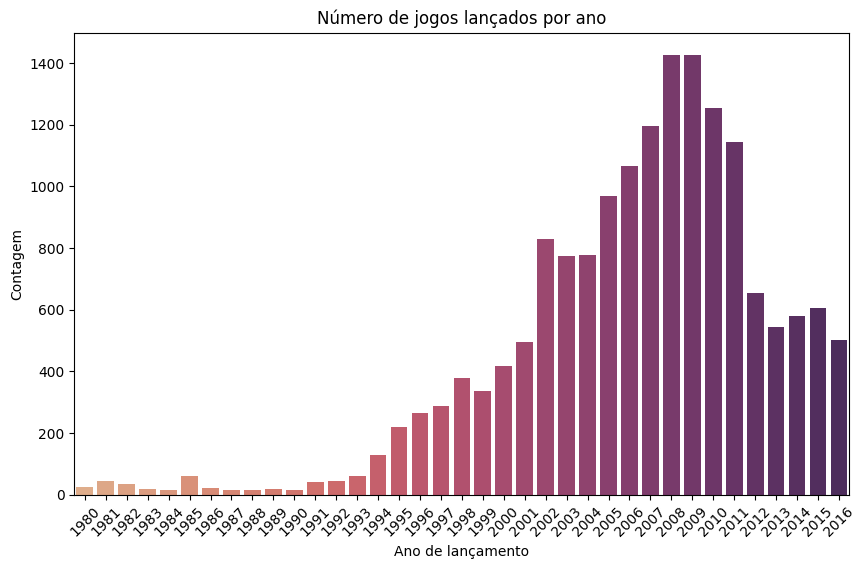

In [75]:
#analisando os dados
# quantos jogos foram lançados em anos diferentes 
def count_values():
    total_release_year = game_df['year_of_release'].value_counts().reset_index()
    total_release_year.columns = ['release_year', 'count']
    total_release_year = total_release_year.sort_values(by='release_year', ascending=False)
    return total_release_year

#plotando gráfico de barras
release_year_data = count_values()
plt.figure(figsize=(10, 6))
sns.barplot(data=release_year_data, x='release_year', y='count', palette='flare')
plt.title('Número de jogos lançados por ano')
plt.xlabel('Ano de lançamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-info">
É possível observar que o período de mais lançamentos foi do ano de 2006 a 2011, superando a marca de mais de mil lançamentos. 
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Contagem correta por aqui, ams um plot viria bem a calhar acompanhando a conclusão proposta.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>


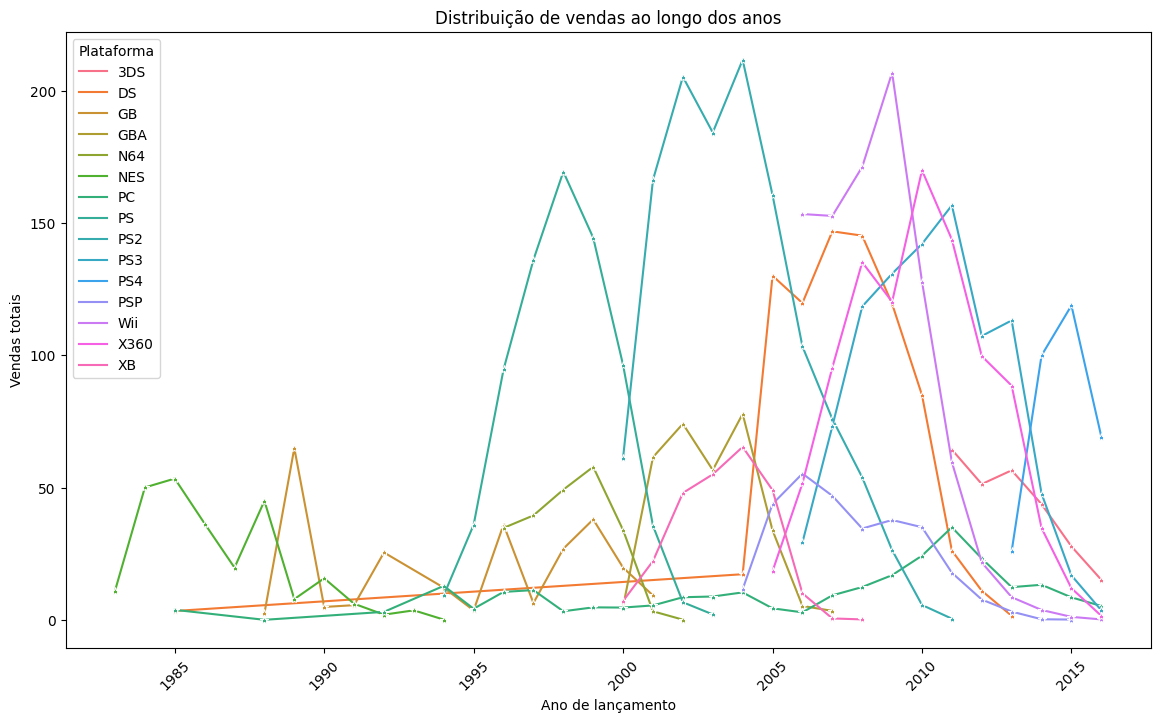

Plataformas com vendas recentes:
['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'PC' 'X360' 'PSV' 'Wii']

Plataformas que eram populares, mas não têm vendas recentes:
16    PS2
4      DS
15     PS
6     GBA
19    PSP
29     XB
5      GB
11    NES
10    N64
Name: platform, dtype: object


In [97]:
#maiores vendas por plataforma

def analyze_platform_sales():
    # agrupando as vendas totais por plataforma e ano
    platform_sales = game_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

    # 20 plataformas com maiores vendas totais
    total_sales_by_platform = game_df.groupby('platform')['total_sales'].sum().reset_index()
    top_platforms = total_sales_by_platform.sort_values(by='total_sales', ascending=False)['platform'].head(15)

    # distribuição de vendas para cada ano das plataformas selecionadas
    sales_distribution = platform_sales[platform_sales['platform'].isin(top_platforms)]

    #definindo ano mais recente
    recent_year = game_df['year_of_release'].max()
    
    #filtrando as plataformas que venderam recentemente
    platforms_with_recent_sales = game_df[game_df['year_of_release'] == recent_year]['platform'].unique()
    
    #filtrando as plataformas que não tiverem vendas recentes
    platforms_with_no_recent_sales = top_platforms[~top_platforms.isin(platforms_with_recent_sales)]

    return sales_distribution, platforms_with_recent_sales, platforms_with_no_recent_sales

# Obter a distribuição de vendas e as plataformas
sales_distribution, platforms_with_recent_sales, platforms_with_no_recent_sales = analyze_platform_sales()

#plotando
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_distribution, x='year_of_release', y='total_sales', hue='platform', marker='*')
sns.color_palette("husl", 15)


plt.title('Distribuição de vendas ao longo dos anos')
plt.xlabel('Ano de lançamento')
plt.ylabel('Vendas totais')
plt.legend(title='Plataforma', loc='upper left')
plt.xticks(rotation=45)
plt.show()

print("Plataformas com vendas recentes:")
print(platforms_with_recent_sales)

print("\nPlataformas que eram populares, mas não têm vendas recentes:")
print(platforms_with_no_recent_sales)


<div class="alert alert-block alert-info">
Olhando para o gráfico, é possível ver que entre os jogos de console existe um variância grande nas vendas, enquanto o PC é bastante constante e, apesar de não ter números tão expressivos, é o único que mantém suas vendas desde o começo, o que é compreensível, pois olhamos apenas para a plataforma PC, sem necessáriamente olhar para quais tiposde PC.<br>
    
Além disso, é interessante ver como se comportam algumas plataformas como o DS, que vem desde 1985 em um lento crescimento e acaba tendo um declínio significativo em entre 2010 e 2015, que é quando é lançado o 3DS, a versão mais moderna dele.
O mesmo acaba acontecendo com as versões do playstation: quando uma nova versão é lançada, a outra acaba diminuindo consideravelmente suas vendas.
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Investigaçao das plataformas foi adequada, mas novamente sento falta de uma visualização para ajudar no entendimento.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Super claro!
    
</div>


In [77]:
#função para analisar a duração de cada plataforma

def analyze_platform_lifespan(game_df):
    
    # identificando o ano de lançamento e de desaparecimento de cada plataforma
    platform_years = game_df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
    platform_years.columns = ['platform', 'first_year', 'last_year']

    # calculando a duração de existência de cada plataforma
    platform_years['duration'] = platform_years['last_year'] - platform_years['first_year'] + 1

    # filtrando por duração de existência
    platform_years = platform_years.sort_values(by='duration', ascending=False)

    return platform_years

platform_lifespans = analyze_platform_lifespan(game_df)

print("Tempo de vida das plataformas:")
print(platform_lifespans)

Tempo de vida das plataformas:
   platform  first_year  last_year  duration
13       PC        1985       2016        32
4        DS        1985       2013        29
5        GB        1988       2001        14
28     X360        2005       2016        12
19      PSP        2004       2015        12
16      PS2        2000       2011        12
11      NES        1983       1994        12
3        DC        1998       2008        11
26      Wii        2006       2016        11
17      PS3        2006       2016        11
0      2600        1980       1989        10
23     SNES        1990       1999        10
15       PS        1994       2003        10
29       XB        2000       2008         9
6       GBA        2000       2007         8
7        GC        2001       2007         7
10      N64        1996       2002         7
2       3DS        2011       2016         6
20      PSV        2011       2016         6
21      SAT        1994       1999         6
27     WiiU        2012 

<div class="alert alert-block alert-info">
Existem plataformas que demoraram décadas para se tornarem obsoletas, como é o caso do PS2 e do DS. São duas plataformas muito consolidadas no mercado, com jogos que fizeram a infância e adolescência de muitos adultos de hoje em dia e, possívelmente por isso, acabam se tornando clássicos que vivem no coração de muitas pessoas. 
Na contramão dessas plataformas consolidadas, existem as novas, como o PS4, Wii e WiiU que nasceram há pelo menos 4 anos (como é o caso do PS4) e estão em ascenção, com jogos novos sendo lançados exclusivamente para elas, por exemplo. 
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ciclo de vida corretamente endereçado por aqui!
</div>


In [78]:
def analyze_platforms(game_df):
    # vou usar dados a partir de 2006
    game_df = game_df[game_df['year_of_release'] >= 2006]
    
    #filtrando as vendas totais por plataforma
    platform_sales = game_df.groupby('platform')['total_sales'].sum().reset_index()
    platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
    
    print("Plataformas liderando em vendas:")
    print(platform_sales)
    
    #tendencia de crescimento
    annual_sales = game_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
    sales_trend = annual_sales.pivot(index='year_of_release', columns='platform', values='total_sales')
    
    print("\nTendência de vendas por plataforma:")
    print(sales_trend)
    
    #plataformas com crescimento positivo
    growth_analysis = sales_trend.pct_change().mean().reset_index()
    growth_analysis.columns = ['platform', 'average_growth_rate']
    growth_analysis = growth_analysis.sort_values(by='average_growth_rate', ascending=False)
    
    print("\nPlataformas com crescimento positivo:")
    print(growth_analysis)
    
analyze_platforms(game_df)


Plataformas liderando em vendas:
   platform  total_sales
13     X360       952.99
7       PS3       939.65
11      Wii       907.51
2        DS       655.35
8       PS4       314.14
6       PS2       265.80
0       3DS       259.00
9       PSP       238.63
5        PC       163.42
15     XOne       159.32
12     WiiU        82.19
10      PSV        54.07
4        GC        11.53
14       XB        10.77
3       GBA         8.68
1        DC         0.06

Tendência de vendas por plataforma:
platform           3DS    DC      DS   GBA     GC     PC     PS2     PS3  \
year_of_release                                                            
2006               NaN   NaN  119.81  5.28  11.26   2.85  103.42   29.27   
2007               NaN  0.02  146.94  3.40   0.27   9.28   75.99   73.19   
2008               NaN  0.04  145.31   NaN    NaN  12.42   53.90  118.52   
2009               NaN   NaN  119.54   NaN    NaN  16.91   26.40  130.93   
2010               NaN   NaN   85.02   NaN    NaN

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Escolha de dados a partir de 2006 está ok!
</div>


<div class="alert alert-block alert-info">
O PS4, 3DS e o XOne se destacaram por ter vendas expressivas, acima dos 10 milhões de vendas totais. Sendo que o 3Ds foi o que mais teve um crescimento positivo.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Plataformas mais populares investigadas!
</div>


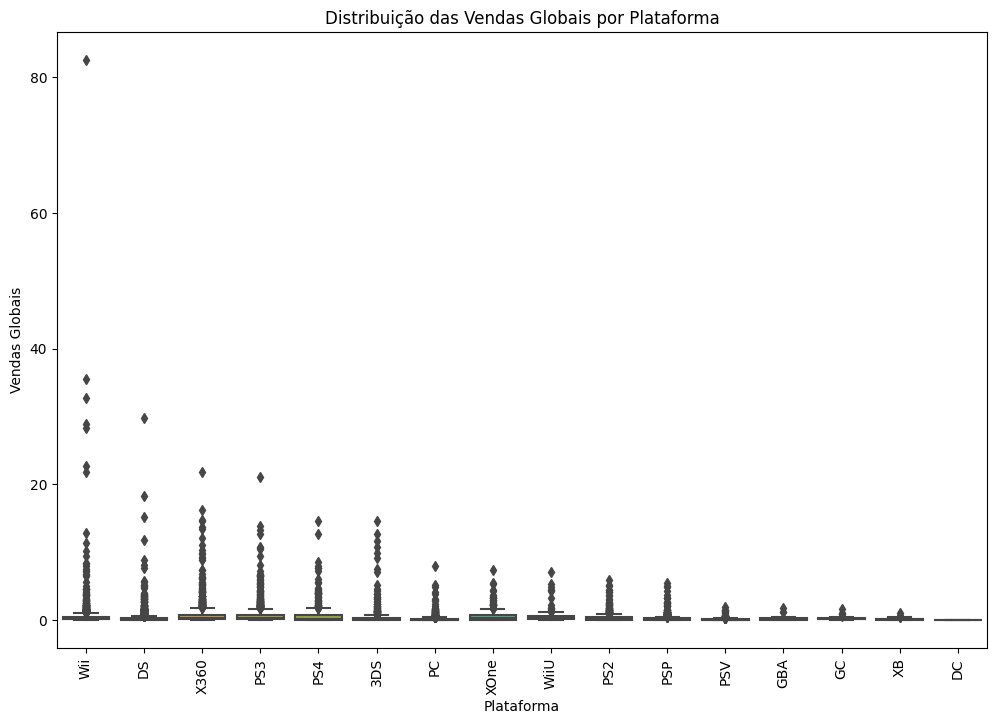

Vendas médias por plataforma:
   platform  total_sales
8       PS4     0.801378
13     X360     0.785000
7       PS3     0.705973
11      Wii     0.687508
15     XOne     0.645020
12     WiiU     0.559116
0       3DS     0.498077
2        DS     0.331152
6       PS2     0.330186
4        GC     0.262045
9       PSP     0.220342
5        PC     0.210593
3       GBA     0.192889
14       XB     0.163182
10      PSV     0.125744
1        DC     0.030000


In [79]:
#função para analisar a distribuição das vendas

def analyze_sales_distribution(game_df):
    # plotando um diagrama de caixa para as vendas por plataforma
    #definindo o ano para 2006 para frente
    game_df = game_df[game_df['year_of_release'] >= 2006]
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=game_df, x='platform', y='total_sales')
    plt.xticks(rotation=90)
    plt.title('Distribuição das Vendas Globais por Plataforma')
    plt.xlabel('Plataforma')
    plt.ylabel('Vendas Globais')
    plt.show()

    # Calcular vendas médias por plataforma
    mean_sales_platform = game_df.groupby('platform')['total_sales'].mean().reset_index()
    mean_sales_platform = mean_sales_platform.sort_values(by='total_sales', ascending=False)

    print("Vendas médias por plataforma:")
    print(mean_sales_platform)


analyze_sales_distribution(game_df)

<div class="alert alert-block alert-info">
Agora faz mais sentido esses dados. 
    
Podemos observar que eles se mantem em um padrão até que parecido, não ultrapassando a marca dos 20 milhões, sendo que o Wii tem um outlier bem grande, acima de 80 milhões. <br> 
    
A venda média por plataformas é bastante interessante: o Xbox 360, que foi lançado em 2005, fica em segundo lugar como os que mais vendem, ficando atrás apenas do PS4, lançado em 2013. Além disso, é possível observar que o PS4 e o Xbox 360 tem uma média de vendas similares, apesar de um estar há pelo menos 10 anos a mais que o outro no mercado.
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Obrigado pelo boxplot, mas note que após a escolha do período de 2006, todas as análises posteriores devem utilizar esse filtro.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito!
    
</div>


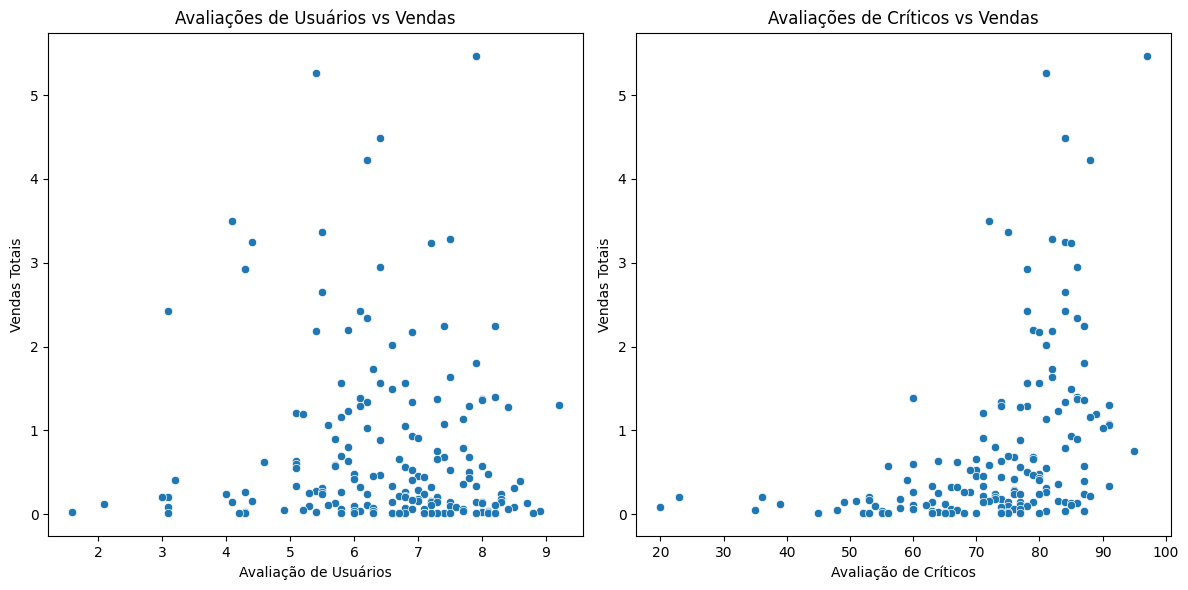

Correlação entre avaliações de usuários e vendas: -0.07
Correlação entre avaliações de críticos e vendas: 0.42


In [80]:
#função para analisar a correlação das avaliações na plataforma XOne

def review_effects(game_df, platform):
    # filtrando os dados para plataforma escolhida
    platform_data = game_df[game_df['platform'] == platform]
    
    # plotando gráfico de dispersão para avaliações de usuários vs vendas
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(data=platform_data, x='user_score', y='total_sales')
    plt.title('Avaliações de Usuários vs Vendas')
    plt.xlabel('Avaliação de Usuários')
    plt.ylabel('Vendas Totais')

    # plotando gráfico de dispersão para avaliações de críticos vs vendas
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=platform_data, x='critic_score', y='total_sales')
    plt.title('Avaliações de Críticos vs Vendas')
    plt.xlabel('Avaliação de Críticos')
    plt.ylabel('Vendas Totais')

    plt.tight_layout()
    plt.show()

    # Calcular a correlação entre avaliações de usuários e vendas
    user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

    print(f"Correlação entre avaliações de usuários e vendas: {user_score_corr:.2f}")
    print(f"Correlação entre avaliações de críticos e vendas: {critic_score_corr:.2f}")
    
review_effects(game_df, 'XOne')


<div class="alert alert-block alert-info">
Existe uma correlação muito baixa entre a avaliação dos usuários e as vendas para o XOne, sendo de 0.11 e 0.39 números muito próximos de 0 para considerarmos que eles existem alguma relação.
</div>

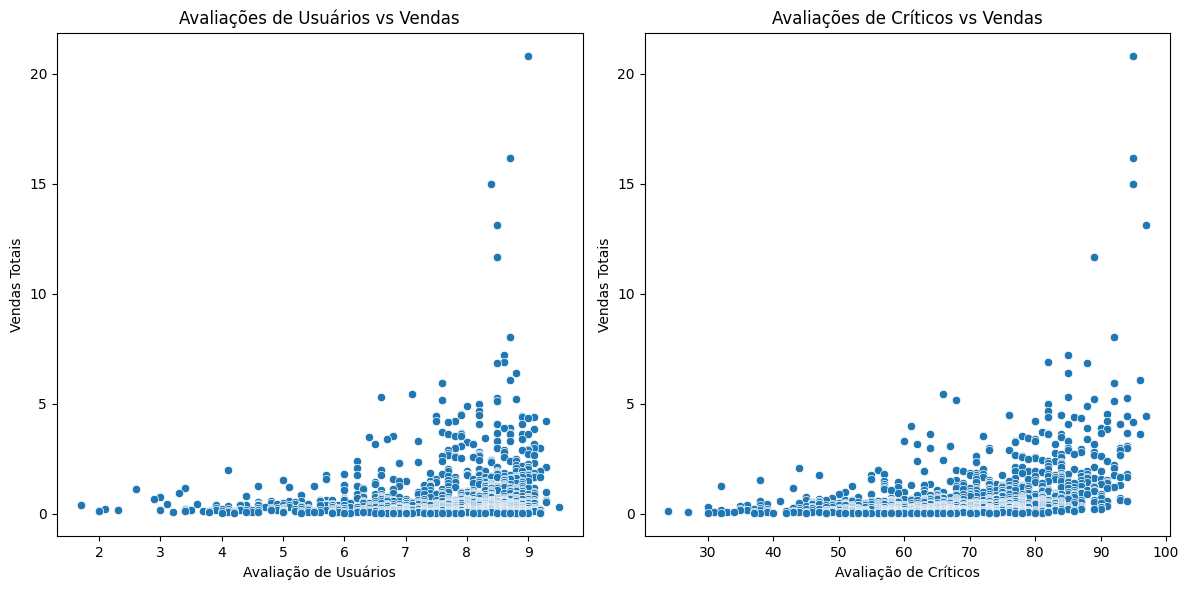

Correlação entre avaliações de usuários e vendas: 0.17
Correlação entre avaliações de críticos e vendas: 0.40


In [81]:
#fazendo a mesma comparaão para o PS4
review_effects(game_df, 'PS2')

<div class="alert alert-block alert-info">
Essa comparação feita para o PS2 também indica uma correlação bem baixa, até um pouco próxima do comportamento visto no XOne.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Correlações foram exploradas corretamente e visualizações/conclusões foram fornecidas.
</div>


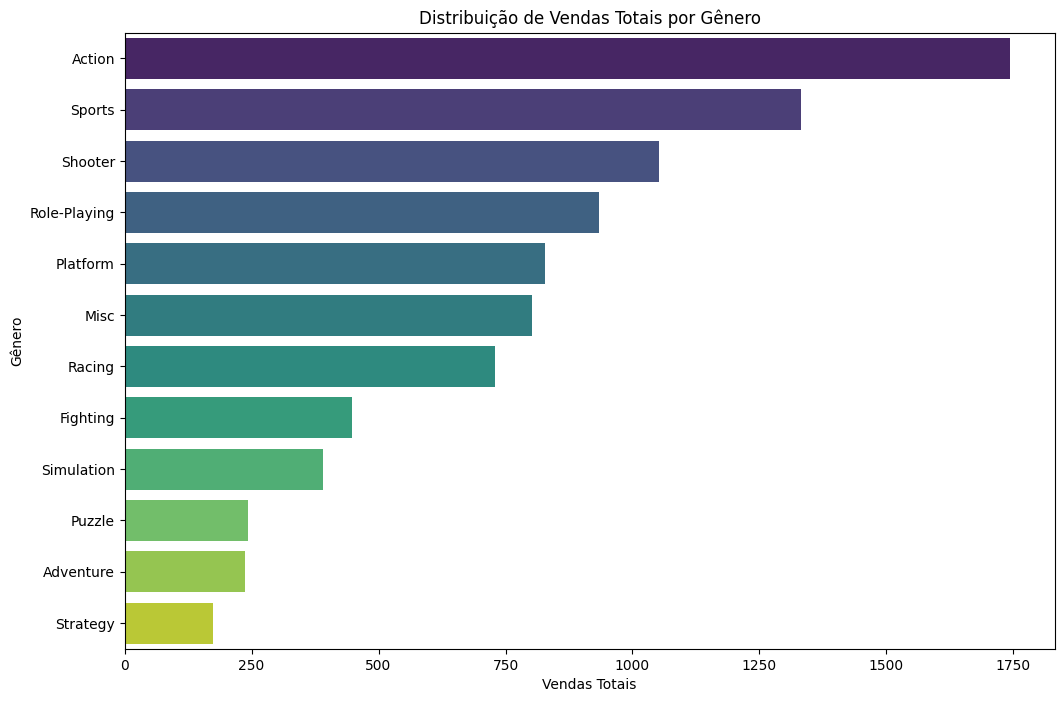

In [82]:
#função para analisar as vendas por genero

def genre_sales(game_df):
    # calculando as vendas totais por gênero
    sales_by_genre = game_df.groupby('genre')['total_sales'].sum().reset_index()
    sales_by_genre = sales_by_genre.sort_values(by='total_sales', ascending=False)
    
    # visualizando a distribuição de vendas por gênero
    plt.figure(figsize=(12, 8))
    sns.barplot(data=sales_by_genre, x='total_sales', y='genre', palette='viridis')
    plt.title('Distribuição de Vendas Totais por Gênero')
    plt.xlabel('Vendas Totais')
    plt.ylabel('Gênero')
    plt.show()

genre_sales(game_df)

<div class="alert alert-block alert-info">
É possível observar que o gênero mais popular em vendas é o de ação e o menor de estratégia. Poderíamos generalizar é dizer que esses jogos são os mais populares por existem mais jogos dessa categoria no mercado, porém seria necessário um olhar mais aprofundado nessa questão, uma análise de todos os jogos existentes e suas variáveis.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Gêneros foram investigados com sucesso!
</div>


In [83]:
#função para analisar as vendas por região:

def region_count(game_df, col):
    # calculando as vendas totais por plataforma em cada região
    region_sales = game_df.groupby(col).agg({
        'na_sales': 'sum',
        'eu_sales': 'sum',
        'jp_sales': 'sum'
    }).reset_index()
    
    # top 5 de cada região
    top_na = region_sales.nlargest(5, 'na_sales')
    top_eu = region_sales.nlargest(5, 'eu_sales')
    top_jp = region_sales.nlargest(5, 'jp_sales')
    
    print(f"Top 5 {col} in North America:")
    print(top_na)
    
    print(f"\nTop 5 {col} in Europe:")
    print(top_eu)
    
    print(f"\nTop 5{col} in Japan:")
    print(top_jp)
    
    # quotas de mercado das principais plataformas em diferentes regiões
    comparison_df = pd.merge(top_na, top_eu, on=col, how='outer', suffixes=('_na', '_eu'))
    comparison_df = pd.merge(comparison_df, top_jp, on=col, how='outer', suffixes=('', '_jp'))
    
    print(f"\nComparação das quotas de mercado das principais {col}:") #aqui nao soube escrever em ingles kkk
    print(comparison_df[[col, 'na_sales', 'eu_sales', 'jp_sales']])


region_count(game_df, 'platform')

Top 5 platform in North America:
   platform  na_sales  eu_sales  jp_sales
28     X360    602.47    270.76     12.43
16      PS2    583.84    339.29    139.20
26      Wii    496.90    262.21     69.33
17      PS3    393.49    330.29     80.19
4        DS    382.40    188.89    175.57

Top 5 platform in Europe:
   platform  na_sales  eu_sales  jp_sales
16      PS2    583.84    339.29    139.20
17      PS3    393.49    330.29     80.19
28     X360    602.47    270.76     12.43
26      Wii    496.90    262.21     69.33
15       PS    336.52    213.61    139.82

Top 5platform in Japan:
   platform  na_sales  eu_sales  jp_sales
4        DS    382.40    188.89    175.57
15       PS    336.52    213.61    139.82
16      PS2    583.84    339.29    139.20
23     SNES     61.23     19.04    116.55
2       3DS     83.49     61.48    100.67

Comparação das quotas de mercado das principais platform:
  platform  na_sales  eu_sales  jp_sales
0     X360       NaN       NaN       NaN
1      PS2    583.

<div class="alert alert-block alert-info">
O comportamento da américa do norte e da europa é similar em relação as plataformas mais usadas, porém quando olhamos para o Japão, percebemos que as pltaformas nintendo acabam se destacando.
A quota de mercado para a plataforma playstation se desctada na europa e AN, enquanto o caminho oposto acontece no Japão: a cota de mercado para as plataformas nintendo (3DS, SNES, DS) são significativas. 
</div>

In [84]:
#fazendo o mesmo filtro acima, mas para a visão de genero:
region_count(game_df, 'genre')

Top 5 genre in North America:
       genre  na_sales  eu_sales  jp_sales
0     Action    879.01    519.13    161.43
10    Sports    684.43    376.79    135.54
8    Shooter    592.24    317.34     38.76
4   Platform    445.50    200.35    130.83
3       Misc    407.27    212.74    108.11

Top 5 genre in Europe:
      genre  na_sales  eu_sales  jp_sales
0    Action    879.01    519.13    161.43
10   Sports    684.43    376.79    135.54
8   Shooter    592.24    317.34     38.76
6    Racing    359.35    236.51     56.71
3      Misc    407.27    212.74    108.11

Top 5genre in Japan:
           genre  na_sales  eu_sales  jp_sales
7   Role-Playing    330.81    188.71    355.41
0         Action    879.01    519.13    161.43
10        Sports    684.43    376.79    135.54
4       Platform    445.50    200.35    130.83
3           Misc    407.27    212.74    108.11

Comparação das quotas de mercado das principais genre:
          genre  na_sales  eu_sales  jp_sales
0        Action    879.01    5

<div class="alert alert-block alert-info">
O genero de jogos de ação se destaca na Europa e América do Norte, enquanto o de role-playing lidera o ranking no Japão. O que faz sentido, já que a maioria dos jogos da nintendo se enquadram em Role-Playing, enquanto os jogos do playstation e xbox são de ação. 
</div>

In [85]:
#analisando a classficação de acordo com a região
def analyze_rating(game_df, col):    
    #vendas totais por classificação em cada região
    region_sales = game_df.groupby(col).agg({
        'na_sales': 'sum',
        'eu_sales': 'sum',
        'jp_sales': 'sum'
    }).reset_index()
    
    #comparando as vendas entre diferentes classificações
    print("Vendas totais por classificação em cada região:")
    print(region_sales)

analyze_rating(game_df, 'rating')

Vendas totais por classificação em cada região:
  rating  na_sales  eu_sales  jp_sales
0     AO      1.26      0.61      0.00
1      E   1292.99    710.25    198.11
2   E10+    353.32    188.52     40.20
3     EC      1.53      0.11      0.00
4    K-A      2.56      0.27      1.46
5      M    748.48    483.97     64.24
6     RP      0.00      0.08      0.00
7      T    759.75    427.03    151.40


<div class="alert alert-block alert-info">
Os jogos de classificação 'E' (explicit) lideram de forma bastante destacada na região da América do Norte, enquanto no Japão, esse número é muito menor. Quando voltamos a comparação de quais plataformas são mais comum em quais regiões, também podemos ver que faz sentido essa comparação, afinal, a maioria dos jogos da Nintendo tem classficação T (teen). 
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

COmparativos de perfis por região para classificação, gênero e plataforma foram fornecidos.
</div>


In [86]:
#Testando hipósteses:

#fazendo uma função base
def rating_test(df, col, row1, row2, col2):
    filtered_1 = df[df[col] == row1][col2]
    filtered_2 = df[df[col] == row2][col2]
    
    #calculando media
    filtered_1_mean = filtered_1.mean()
    filtered_2_mean = filtered_2.mean()
    
    #teste t
    t_stat, p_value = ttest_ind(filtered_1.dropna(), filtered_2.dropna())
    
    print(f"Média das classificações dos usuários para {row1}: {filtered_1_mean:.2f}")
    print(f"Média das classificações dos usuários para {row2}: {filtered_2_mean:.2f}")
    print(f"Estatística t: {t_stat:.2f}")
    print(f"Valor p: {p_value:.4f}")
    
    
    if p_value < 0.05:
        print(f"As classificações médias dos usuários para {row1} e {row2} são significativamente diferentes.")
    else:
        print(f"Não há diferença significativa entre as classificações médias dos usuários para  {row1} e {row2}.")


***
#### Testando a hipótese de que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

H₀: As médias das classificações para os gêneros Action e Sports são iguais.<br>
H₁: As médias das classificações para os gêneros Action e Sports são diferentes<br>

Se o valor de alpha for menor do que 0.05, significa que as avaliações para esses dois gêneros são diferentes. 
Caso seja maior, eles possuem quase as mesmas avaliações.
***



In [87]:
rating_test(game_df, 'genre', 'Action','Sports','user_score')

Média das classificações dos usuários para Action: 7.05
Média das classificações dos usuários para Sports: 6.96
Estatística t: 1.63
Valor p: 0.1041
Não há diferença significativa entre as classificações médias dos usuários para  Action e Sports.


***
#### Testando a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

H₀: Testando a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.<br>
H₁:Testando a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC são diferentes<br>

Se o valor de alpha for menor do que 0.05, significa que as avaliações para esses plataformas são diferentes. 
Caso seja maior, eles possuem quase as mesmas avaliações.
***


In [88]:
rating_test(game_df, 'platform', 'XOne','PC','user_score')

Média das classificações dos usuários para XOne: 6.52
Média das classificações dos usuários para PC: 7.06
Estatística t: -4.37
Valor p: 0.0000
As classificações médias dos usuários para XOne e PC são significativamente diferentes.


<div class="alert alert-block alert-info">
O valor de alpha foi definido para 0.05 por ser um valor padrão, que evita resultado com falsos positivos.
Defini no texto acima qual minha hipótese nula e qual minha hipótese alternativa.<br>
    
No primeiro resultado, tivemos uma diferença bem pequena entre as avaliações e o valor de p acima de 0.05, o que indica que as avaliações **não são** diferentes umas das outras.<br>

Já no segundo resultado, tivemos uma diferença significativa nas avaliações (mais que 0,50 entre um e outro) e o valor p foi quase 0, o que indica que as avaliações **são** diferentes uma das outras.
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo aqui, mas alguns ajustes se fazem necessários aqui:
    
1. Lembre-se de descrever com clarezas as hipóteses que estão sendo tratadas.
2. O problema com o segundo teste parece ter a ver com um typo em Xone (XOne), me parece que essa é a razão do filtro retornar uma lista nula.
    

</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito! Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>

# CONCLUSÃO FINAL

<div class="alert alert-block alert-info">
Olhar para os dados filtrando-os por regiões nos dá um norte bem interessante, porque dessa forma podemos entender como cada público se comporta. Se olharmos para o comparativo entre America do Norte e Japão, por exemplo, é possível perceber que o primeiro consome muitos produtos da Playstation, joga muitos jogos de ação e com classificação Explicita, enquanto o segundo consome mais jogos da Nintendo, de Role Play e classificação Teen.
Então, se por exemplo a Sony lançasse um novo jogo de ação, voltado principalmente para o público adulto, saberíamos que nossas estratégias de marketing intensificadas na América do Norte.
</div


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Conclusão fornecida!
</div>
